# Data Science проект:

1)   Постановка задачи
2)   Получение данных

3)    Анализ данных
4)    Визуализация данных
5)    Предобработка данных
6)    Генерация новых признаков
7)    Построение модели
8)    Оценка качества

9)    Внедрение модели
10)    Мониторинг качества и улучшение модели



In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
import sqlite3 as sl
import matplotlib.pyplot as plt


from scipy.stats import mode
import warnings
warnings.filterwarnings('ignore')

# Обращаемся к базе данных и получаем данные по конкретной валютной паре.  
def database():
    database = sl.connect('database.db')
    df = pd.read_sql_query("SELECT * FROM order_book WHERE cur_pair='BTC_RUB'", database)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')    
    return df

# Описание задачи

### Цель
- предсказать стоимость криптовалюты в торговой паре **'BTC_RUB'** на основании собираемой базы данный скюльлайт. В эту базу данных каждые 15 минут автоматический скрипт сбора данных добавляет данные полученные с биржи АПИАЙ запросом. 

### Зачем? 
- для успешной торговли на бирже, учебный проект на основании курсов гикбрейнс.


In [18]:
df = database() 

# Описание датасета 

данные собираемые апиай запросом с биржи эксмо.ми . Запрос автоматический каждые 15 минут.

1) datetime  - дата время сбора данных   
2) cur_pair  - название валютной пары        
3) price     - цена   (RUB)
4) ask_amount  - сумма спроса (RUB)
5) ask_quantity  - количество спроса (BTC)       
6) ask_top - последняя предложенная цена на покупку (RUB)      
7) bid_amount  - сумма предожения  (RUB)     
8) bid_quantity - количество предложения (RUB?BTC)     
9) bid_top   -  последняя предложенная цена на продажу (RUB) 


In [3]:
df.head()

,datetime,cur_pair,price,ask_amount,ask_quantity,ask_top,bid_amount,bid_quantity,bid_top
0,2024-02-01 20:44:00,BTC_RUB,3841223.730,5.216300e+07,10.264032,3852447.46,2.234423e+07,5.113713e+06,3830000.00
1,2024-02-01 20:53:00,BTC_RUB,3850722.615,5.215359e+07,10.261594,3862758.66,2.233100e+07,5.113713e+06,3838686.57
2,2024-02-01 21:08:00,BTC_RUB,3850000.000,5.218721e+07,10.270315,3859999.99,2.235790e+07,5.113713e+06,3840000.01
3,2024-02-01 21:23:00,BTC_RUB,3850000.010,5.215442e+07,10.261818,3860000.00,2.239858e+07,5.113713e+06,3840000.02
4,2024-02-01 21:38:00,BTC_RUB,3842500.000,5.215497e+07,10.261964,3855000.00,2.236536e+07,5.113713e+06,3830000.00


# Обзор количественных переменных

Количественные (непрерывные) переменные - это переменные, которые могут принимать любые числовые значения в некотором диапазоне.


In [4]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

In [5]:
df_num_features.describe()

,price,ask_amount,ask_quantity,ask_top,bid_amount,bid_quantity,bid_top
count,9.570000e+02,9.570000e+02,957.000000,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02
mean,4.041037e+06,4.977875e+07,9.377054,4.048719e+06,2.546774e+07,5.113715e+06,4.033356e+06
std,1.904151e+05,2.867104e+06,0.790353,1.903044e+05,2.831637e+06,1.459967e+00,1.906718e+05
min,3.841224e+06,4.319979e+07,7.666208,3.852447e+06,2.233100e+07,5.113713e+06,3.830000e+06
25%,3.887500e+06,4.754794e+07,8.805978,3.895000e+06,2.338989e+07,5.113713e+06,3.879883e+06
50%,3.905878e+06,5.119879e+07,9.592751,3.911757e+06,2.355088e+07,5.113713e+06,3.900000e+06
75%,4.258000e+06,5.193368e+07,10.052397,4.266000e+06,2.899169e+07,5.113716e+06,4.250002e+06
max,4.393602e+06,5.249964e+07,10.270315,4.398896e+06,3.060561e+07,5.113717e+06,4.393204e+06


In [6]:
df['price'].describe()

count    9.570000e+02
mean     4.041037e+06
std      1.904151e+05
min      3.841224e+06
25%      3.887500e+06
50%      3.905878e+06
75%      4.258000e+06
max      4.393602e+06
Name: price, dtype: float64

In [7]:
df['ask_top'].value_counts()

ask_top
3900000.00    66
3880000.00    34
3890000.00    23
3895000.00    18
3899999.99    16
              ..
3906954.93     1
3899599.98     1
3896912.37     1
3897545.54     1
3945000.00     1
Name: count, Length: 387, dtype: int64

In [8]:
df['bid_top'].value_counts()

bid_top
4362000.00    22
3880000.00    20
3880000.01    16
3879883.00    15
4367000.00    15
              ..
3860695.03     1
3898434.60     1
3831000.11     1
3872647.43     1
4005662.88     1
Name: count, Length: 563, dtype: int64

# Обзор номинативных переменных

Номинативная (категориальная) переменная - тип дискретной переменной, качественная (неколичественная) переменная величина


In [9]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,cur_pair
0,BTC_RUB
1,BTC_RUB
2,BTC_RUB
3,BTC_RUB
4,BTC_RUB


# Отбор и построение новых признаков

`GPT`:
Исходя из имеющихся столбцов в датасете, можно добавить следующие дополнительные признаки и колонки:

1. Spread: разница между ask_price и bid_price. Этот признак может помочь в анализе ликвидности рынка.
2. Mid_price: среднее значение между ask_price и bid_price. Этот признак может использоваться для оценки текущей цены актива.
3. Total_ask_value: общая стоимость всех ордеров на продажу (ask_price * ask_amount) на данный момент.
4. Total_bid_value: общая стоимость всех ордеров на покупку (bid_price * bid_amount) на данный момент.
5. Imbalance: разница между Total_ask_value и Total_bid_value. Этот признак может указывать на дисбаланс спроса и предложения на рынке.
6. Price_spread_percentage: процентная разница между ask_price и bid_price относительно mid_price. Этот признак может помочь в анализе волатильности цен.
7. Depth: разница между количеством ордеров на продажу и покупку (ask_quanity - bid_quanity). Этот признак может указывать на глубину рынка.

Эти дополнительные признаки могут помочь в более глубоком анализе рыночных данных и принятии более информированных решений при торговле.

In [4]:
df['spread'] = df['ask_top'] - df['bid_top'] 
df['delta_amount'] = df['ask_amount'] - df['bid_amount'] 
df['depth'] = df['ask_quantity'] - df['bid_quantity'] 
df['total_ask_value'] = df['ask_amount'] * df['ask_top'] 
df['total_bid_value'] = df['bid_amount'] * df['bid_top'] 
df['imbalance'] = df['total_ask_value'] - df['total_bid_value']
df['price_spread_percentage'] = ((df['ask_top'] - df['bid_top'])/((df['ask_top'] + df['bid_top'])))*100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   datetime                 986 non-null    datetime64[ns]
 1   cur_pair                 986 non-null    object        
 2   price                    986 non-null    float64       
 3   ask_amount               986 non-null    float64       
 4   ask_quantity             986 non-null    float64       
 5   ask_top                  986 non-null    float64       
 6   bid_amount               986 non-null    float64       
 7   bid_quantity             986 non-null    float64       
 8   bid_top                  986 non-null    float64       
 9   spread                   986 non-null    float64       
 10  delta_amount             986 non-null    float64       
 11  depth                    986 non-null    float64       
 12  total_ask_value          986 non-nul

# Визуализация и анализ данных.
### EDA
    Загрузка данных
    Уменьшение объема памяти, который занимает датасет
    1. Распределение целевой переменной
    2. Анализ признаков
        2.1 Количественные признаки
        2.2 Категориальные признаки
        2.3 Бинарные признаки
        2.4 Матрица корреляций
    3. Анализ зависимости таргета от фичей
        3.1 Количественные признаки
        3.2 Категориальные / бинарные признаки
        3.3 Гео данные

EDA - Exploratory Data Analysis

Зачем это?

- Понимание, как устроены данные
- Проверка фичей на адекватность
- Генерация новых фич - наибольший вклад в качество прогноза

3 шага EDA в Data Science

- Распределение таргета
- Распределение фичей
- Графики влияния фичей на таргет



In [19]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

# Обращаемся к базе данных и получаем данные по конкретной валютной паре.  
def database():
    database = sl.connect('database.db')
    df = pd.read_sql_query("SELECT * FROM order_book WHERE cur_pair='BTC_RUB'", database)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')    
    return df

def prep_df(df):
    df['spread'] = df['ask_top'] - df['bid_top'] 
    df['delta_amount'] = df['ask_amount'] - df['bid_amount'] 
    df['depth'] = df['ask_quantity'] - df['bid_quantity'] 
    df['total_ask_value'] = df['ask_amount'] * df['ask_top'] 
    df['total_bid_value'] = df['bid_amount'] * df['bid_top'] 
    df['imbalance'] = df['total_ask_value'] - df['total_bid_value']
    df['price_spread_percentage'] = ((df['ask_top'] - df['bid_top'])/((df['ask_top'] + df['bid_top'])))*100
  
    return df


df = database()
prep_df = prep_df(df)

# Распределение целевой переменной

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

# Целевая переменная:
**df['price']**


median - 3909965.9975
mean - 4052573.5944421906
mode - 3887500.0


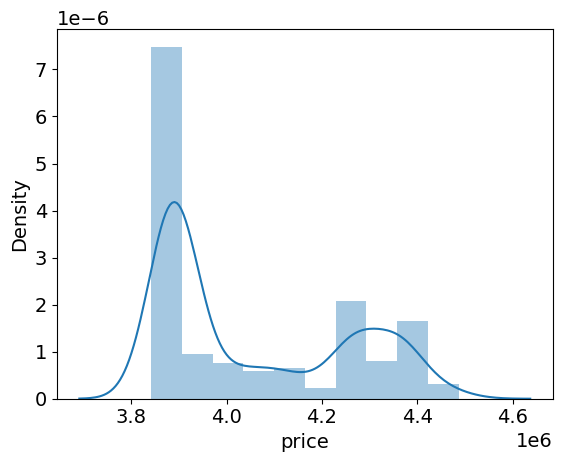

In [7]:
x = prep_df['price']
print(f'median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x)[0][0]}')
sns.distplot(x, bins=10);

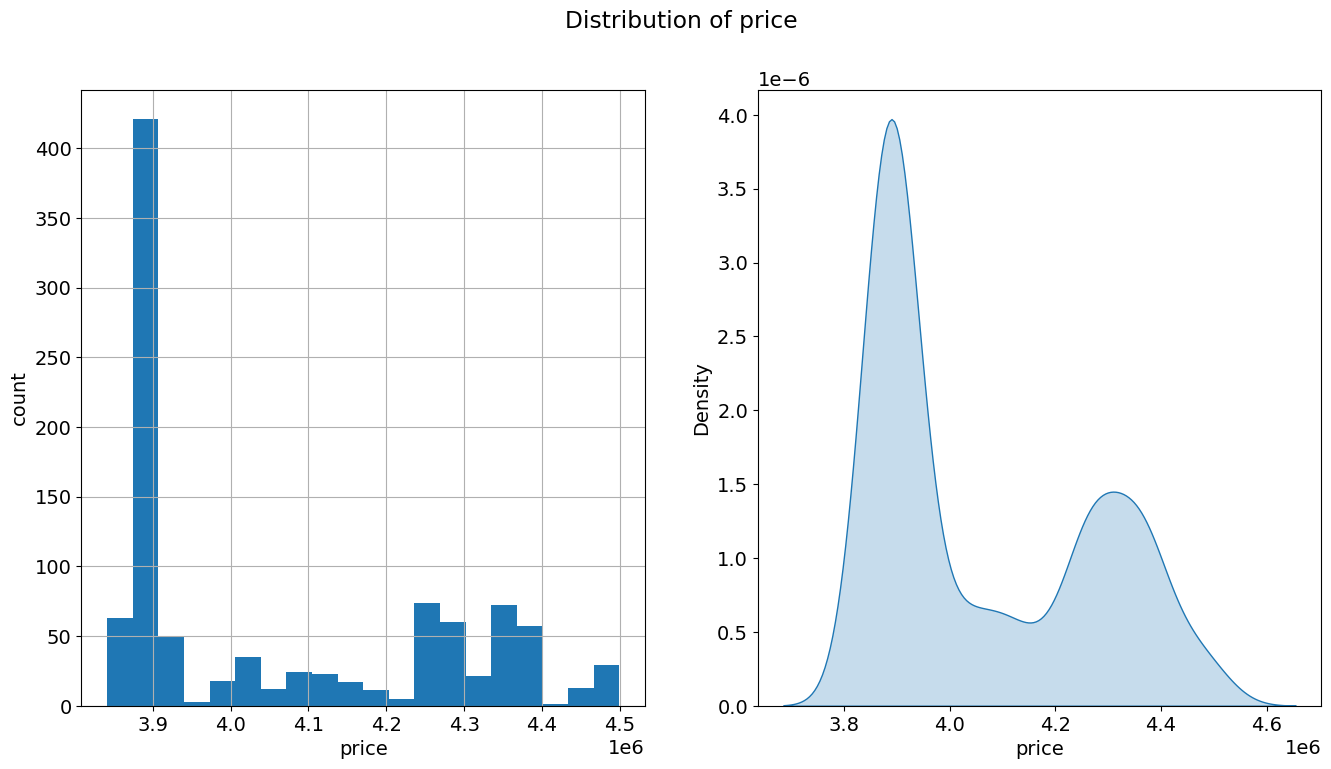

In [20]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
prep_df['price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('price')

plt.subplot(122)
sns.kdeplot(prep_df['price'], shade=True, legend=False)
plt.xlabel('price')

plt.suptitle('Distribution of price')
plt.show()

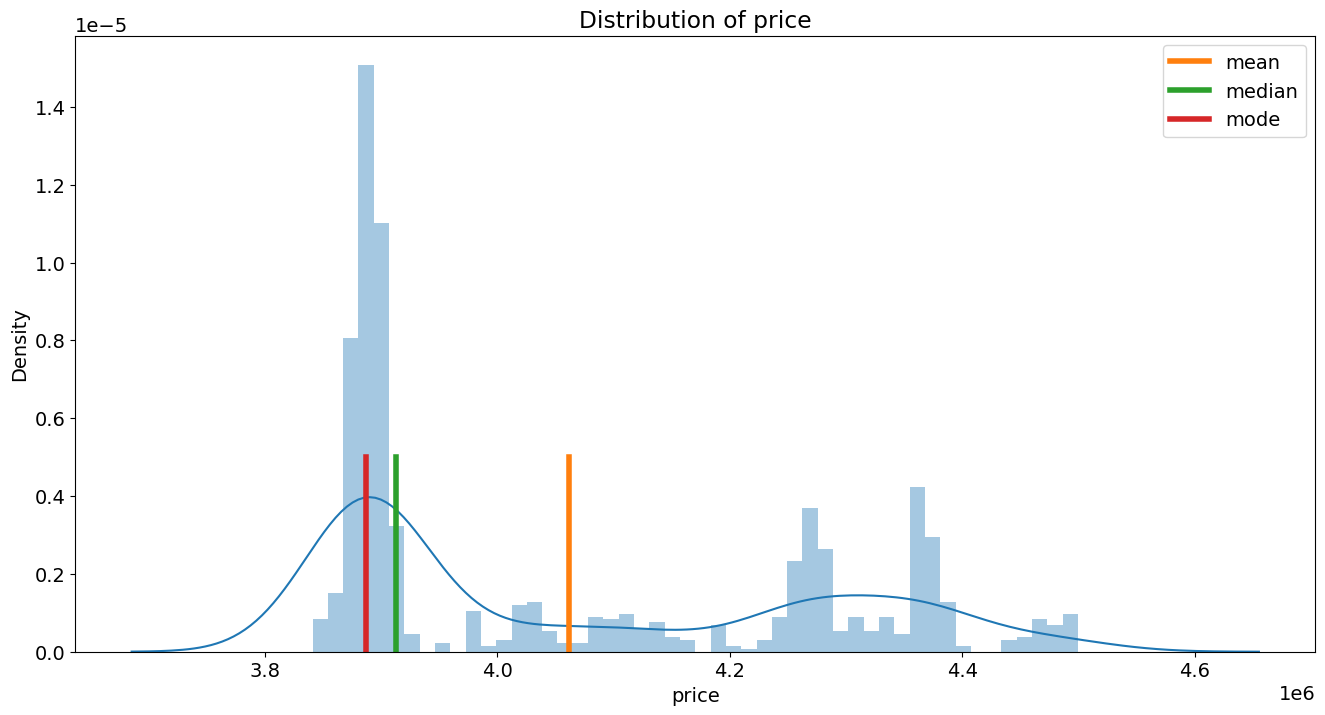

In [21]:
target_mean = round(prep_df['price'].mean(), 2)
target_median = prep_df['price'].median()
target_mode = prep_df['price'].mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(prep_df['price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

# Анализ признаков. 
### Количественные признаки

array([[<Axes: title={'center': 'ask_amount'}>,
        <Axes: title={'center': 'ask_quantity'}>,
        <Axes: title={'center': 'ask_top'}>,
        <Axes: title={'center': 'bid_amount'}>],
       [<Axes: title={'center': 'bid_quantity'}>,
        <Axes: title={'center': 'bid_top'}>,
        <Axes: title={'center': 'spread'}>,
        <Axes: title={'center': 'delta_amount'}>],
       [<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'total_ask_value'}>,
        <Axes: title={'center': 'total_bid_value'}>,
        <Axes: title={'center': 'imbalance'}>],
       [<Axes: title={'center': 'price_spread_percentage'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

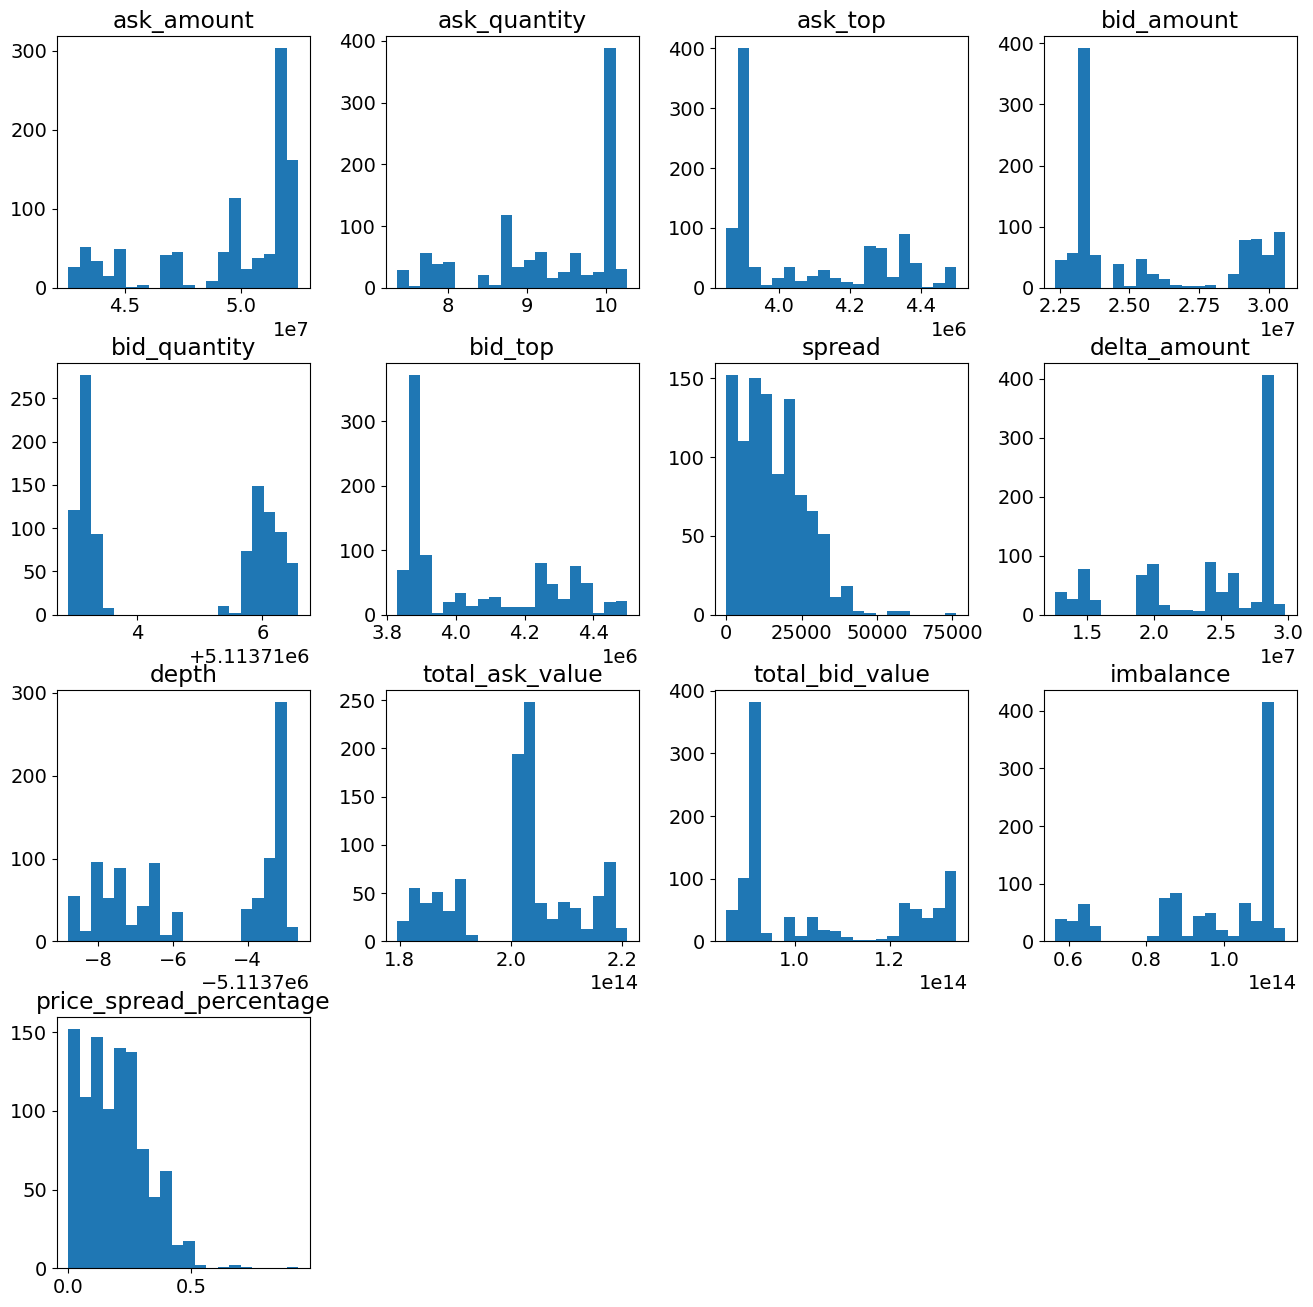

In [22]:
df_num_features = prep_df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('price', axis=1, inplace=True)

df_num_features.hist(figsize=(16,16), bins=20, grid=False)

# Матрица корреляций

In [26]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = prep_df['price'].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

TypeError: corr() missing 1 required positional argument: 'other'

<Figure size 1500x1000 with 0 Axes>

# `GPT`: 
Для создания предиктивной модели на основе датасета с 14 столбцами, включая столбец 'price', вам следует выполнить следующие шаги:

### 1. Загрузите данные: 
Импортируйте библиотеки pandas и numpy для работы с данными и загрузите ваш датасет.
```
import pandas as pd
import numpy as np

data = pd.read_csv('имя_файла.csv')
```

### 2. Подготовьте данные: 
Очистите данные от пропущенных значений и выполните необходимую предобработку данных, такую как кодирование категориальных переменных и масштабирование числовых признаков.

### 3. Разделите данные на обучающий и тестовый наборы: 
Разделите данные на признаки (X) и целевую переменную (y), затем разделите их на обучающий и тестовый наборы.
```
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

#### 4. Выберите модель: 
Выберите подходящий алгоритм машинного обучения для вашей задачи регрессии, например, линейную регрессию, случайный лес или градиентный бустинг.

### 5. Обучите модель: 
Используйте обучающий набор данных для обучения выбранной модели.
```
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
```

### 6. Оцените модель: 
Оцените производительность модели на тестовом наборе данных с помощью метрик оценки регрессии, таких как 
- средняя абсолютная ошибка (MAE), 
- средняя квадратичная ошибка (MSE) 
- коэффициент детерминации (R^2).
```
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
```

### 7. Подгоните модель (опционально):
Если необходимо улучшить производительность модели, вы можете настроить параметры модели или попробовать другие алгоритмы машинного обучения.

### 8. Используйте модель для прогнозирования: Используйте обученную модель для прогнозирования цен на новых данных.

Это основные шаги для создания предиктивной модели на Python на основе вашего датасета с 14 столбцами. Вам может потребоваться провести дополнительные шаги в зависимости от конкретных особенностей вашего датасета и задачи.

Для создания предиктивной модели на основе датасета с 14 столбцами, включая столбец 'price', и выполнения масштабирования числовых признаков, вы можете использовать следующий подход:

# 1) Загрузите данные: 
- Импортируйте библиотеки pandas и numpy для работы с данными
- загрузите ваш датасет.

In [34]:
import numpy as np
import pandas as pd
import sqlite3 as sl

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

# Обращаемся к базе данных и получаем данные по конкретной валютной паре 'BTC_RUB'.  
def database():
    database = sl.connect('database.db')
    df = pd.read_sql_query("SELECT * FROM order_book WHERE cur_pair='BTC_RUB'", database)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')    
    return df

def prep_df(df):
    df['spread'] = df['ask_top'] - df['bid_top'] 
    df['delta_amount'] = df['ask_amount'] - df['bid_amount'] 
    df['depth'] = df['ask_quantity'] - df['bid_quantity'] 
    df['total_ask_value'] = df['ask_amount'] * df['ask_top'] 
    df['total_bid_value'] = df['bid_amount'] * df['bid_top'] 
    df['imbalance'] = df['total_ask_value'] - df['total_bid_value']
    df['price_spread_percentage'] = ((df['ask_top'] - df['bid_top'])/((df['ask_top'] + df['bid_top'])))*100
  
    return df


df = database()
prep_df = prep_df(df)

# 2) Разделите данные на обучающий и тестовый наборы:

- Разделите данные на признаки (X)
- целевую переменную (y), 

In [42]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

X = df_num_features.drop(['price'], axis=1)
y = df_num_features['price']

# 3) Подготовьте данные: 
- Очистите данные от пропущенных значений 
- выполните необходимую предобработку данных
- кодирование категориальных переменных 
- масштабирование числовых признаков с помощью стандартизации или нормализации.

In [43]:
# пример стандартизации с использованием класса StandardScaler из библиотеки sklearn:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Разделите данные на обучающий и тестовый наборы: 
 
- разделите их на обучающий `X_train, y_train` 
- тестовый наборы `X_test, y_test`.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# 5) Выберите подходящий алгоритм машинного обучения:
- линейную регрессию, 
- случайный лес 
- градиентный бустинг.

In [45]:
# линейной регрессией
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 6) Обучите модель: 
- Используйте обучающий набор данных для обучения выбранной модели.

In [46]:
model.fit(X_train, y_train)

LinearRegression()

# 7) Оцените модель: 
Оцените производительность модели на тестовом наборе данных с помощью метрик оценки регрессии, таких как 
- средняя абсолютная ошибка (MAE), 
- средняя квадратичная ошибка (MSE) 
- коэффициент детерминации (R^2).

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))

MAE: 0.001197062400964702
MSE: 2.7353938759290037e-06
R^2: 0.9999999999999999


# ПРИМЕР ИЗ ДЗ ДОЛЖЕН СОПОСТАВИТЬ СО СВОИМ ДАТАСЕТОМ. 
Анализ данных по двум признакам.

### пример задачи с урока:
`Задача:` предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора\
### переформулирую задачу под свои данные:
`Задача:` предсказание цены валюты **price** в зависимости от **ask_amount**

In [18]:
import numpy as np
import pandas as pd
import sqlite3 as sl

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

# Обращаемся к базе данных и получаем данные по конкретной валютной паре.  
def database():
    database = sl.connect('database.db')
    df = pd.read_sql_query("SELECT * FROM order_book WHERE cur_pair='BTC_RUB'", database)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')    
    return df

def prep_df(df):
    df['spread'] = df['ask_top'] - df['bid_top'] 
    df['delta_amount'] = df['ask_amount'] - df['bid_amount'] 
    df['depth'] = df['ask_quantity'] - df['bid_quantity'] 
    df['total_ask_value'] = df['ask_amount'] * df['ask_top'] 
    df['total_bid_value'] = df['bid_amount'] * df['bid_top'] 
    df['imbalance'] = df['total_ask_value'] - df['total_bid_value']
    df['price_spread_percentage'] = ((df['ask_top'] - df['bid_top'])/((df['ask_top'] + df['bid_top'])))*100
  
    return df


df = database()
prep_df = prep_df(df)

Данные из одного признака + 1 фиктивный признак для свободного веса. 

In [45]:
# с домашнего задания массив признака. 
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])


# Предсказания. Задачка регрессии.
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

# Напишем функцию MSE. 
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


(10, 2) <class 'numpy.ndarray'> <class 'list'>


### Подберите скорость обучения (eta) и количество итераций

Перебирать в цикле скорости обучения и количество итераций:
- `etas` - скорости обучкения, 
- `n_iters` - число иттераций.

После записать лучшие параметры `best_params = {}`. Проходимся по скоростям обучения, по иттерациям и фиксируем одни веса. `W = np.array([1, 0.5])`. Мы проверяем именно параметры а не успешные случайности. Затем берём скорость обучения и проходимся в цикле по количеству иттераций.

Получаем предсказания, считаем ошибку, получаем новые веса.

Затем конечную ошибку с равниваем с самой лучшей ошибкой.

In [ ]:
n = X.shape[0]

etas = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
n_iters = [10, 100, 250, 500, 800, 1000]

best_error = np.inf
best_params = {}


for eta in etas:
    for n_iter in n_iters:
        W = np.array([1, 0.5])
        curr_eta = eta
        
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= curr_eta * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                curr_eta /= 1.1
#                 print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
                
        if err < best_error:
            best_error = err
            best_params = {
                'eta': eta,
                'n_iter': n_iter
            }
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

### Перебирать вручную

Руками увеличиваем скорость обучения eta = 0.1 по немногу и смотрим на параметры. Также проверяем с разным числом иттераций. Меняя параметры выискиваем лучшие показатели.


In [50]:
n = X.shape[0]

eta = 0.1
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
#         print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Лучшая ошибка 1.758937337763581e+224 с параметрами {'eta': 0.0001, 'n_iter': 10}


Данные из одного признака **'ask_amount'** + 1 фиктивный признак для свободного веса

In [51]:

# Напишем функцию MSE. 
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err


data = prep_df['ask_amount']
new_data = []
for el in data:
    new_data.append([1, el])
    
X = np.array(new_data)
y = list(prep_df['price'])

n = X.shape[0]

etas = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]
n_iters = [10, 100, 250, 500, 800, 1000]

best_error = np.inf
best_params = {}


for eta in etas:
    for n_iter in n_iters:
        W = np.array([1, 0.5])
        curr_eta = eta
        
        for i in range(n_iter):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= curr_eta * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                curr_eta /= 1.1
#                 print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')
                
        if err < best_error:
            best_error = err
            best_params = {
                'eta': eta,
                'n_iter': n_iter
            }
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

Лучшая ошибка 1.758937337763581e+224 с параметрами {'eta': 0.0001, 'n_iter': 10}


# Перебирать вручную

Руками увеличиваем скорость обучения eta = 0.1 по немногу и смотрим на параметры. Также проверяем с разным числом иттераций. Меняя параметры выискиваем лучшие показатели.


In [52]:
n = X.shape[0]

eta = 0.1
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
#         print(eta)
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 1176        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [-4.06755236e+06 -2.00428415e+14], MSE = 417382422517961.6
Iteration #10: W_new = [-1.05290287e+153 -5.17957413e+160], MSE = inf
Iteration #20: W_new = [-1.04905008e+299 -5.16062098e+306], MSE = inf
Iteration #30: W_new = [nan nan], MSE = nan
Iteration #40: W_new = [nan nan], MSE = nan
Iteration #50: W_new = [nan nan], MSE = nan
Iteration #60: W_new = [nan nan], MSE = nan
Iteration #70: W_new = [nan nan], MSE = nan
Iteration #80: W_new = [nan nan], MSE = nan
Iteration #90: W_new = [nan nan], MSE = nan
Iteration #100: W_new = [nan nan], MSE = nan
Iteration #110: W_new = [nan nan], MSE = nan
Iteration #120: W_new = [nan nan], MSE = nan
Iteration #130: W_new = [nan nan], MSE = nan
Iteration #140: W_new = [nan nan], MSE = nan
Iteration #150: W_new = [nan nan], MSE = nan
Iteration #160: W_new = [nan nan], MSE = nan
Iteration #170: W_new = [nan nan], MSE = nan
Iteration #180: W_ne

In [53]:
(X.T).shape, len(y)

((2, 1176), 1176)

In [54]:
n = X.shape[0]

eta = 1e-2
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)

    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))

    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 1176        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [-4.06754336e+05 -2.00428415e+13], MSE = 417382422517961.6
Iteration #100: W_new = [nan nan], MSE = nan
Iteration #200: W_new = [nan nan], MSE = nan
Iteration #300: W_new = [nan nan], MSE = nan
Iteration #400: W_new = [nan nan], MSE = nan
Iteration #500: W_new = [nan nan], MSE = nan
Iteration #600: W_new = [nan nan], MSE = nan


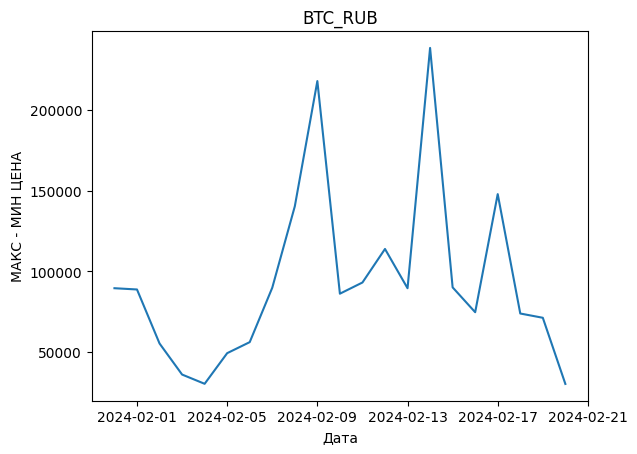

In [28]:
import pandas as pd
from datetime import datetime
import sqlite3 as sl
import matplotlib.pyplot as plt


# Обращаемся к базе данных и получаем данные по конкретной валютной паре.  
def database():
    database = sl.connect('rub_cur_price.db')
    df = pd.read_sql_query("SELECT * FROM price_list WHERE cur_pair='BTC_RUB'", database)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d.%m.%y %H:%M')    
    return df


# АНАЛИТИКА ДАТАСЕТА. 
# 1) сделать список датасетов за день из имеющегося. 
# 2) сделать функцию которая в дневном датасете найдёт минимум цену, максимум цену и дельту
# 3) функция возвращает датасет проанализированный за каждый день.
# 4) функция делает визуальизацию и чертит график дельта от времени

# 1) список датасетов за каждый день. 
def price_analys(df):
    # Создание нового столбца с датой
    df['date'] = df['datetime'].dt.date
    # Группировка данных по уникальным датам
    grouped = df.groupby('date')
    # список датасетов по дням пока пустой
    df_days = []
    # Создание списка датафреймов для каждого дня
    list_of_daily_dfs = [group for _, group in grouped]

    # Добавление результатов пустой список датасетов
    for daily_df in list_of_daily_dfs:
        df_days.append(daily_df)
        
    return df_days 


def price_analys(df):
    
    df['date'] = df['datetime'].dt.date
    grouped = df.groupby('date')
    df_days = []
    list_of_daily_dfs = [group for _, group in grouped]

    for daily_df in list_of_daily_dfs:
        df_days.append(daily_df)
        
    return df_days 
 
# 2) сделать функцию которая в дневном датасете найдёт дату, минимум цену, максимум цену и дельту
def day_price(day_df):
    cur_pair = list(day_df['cur_pair'])[0]
    max_price =  day_df['price'].max()
    min_price =  day_df['price'].min()
    delta = max_price - min_price
    day = list(day_df['date'])[0]
    return [cur_pair, day, max_price, min_price, delta]

# 3) функция возвращает датасет проанализированный за каждый день.
def days_total_info(df):
    day_list = price_analys(df)
    
    cur_pair_list = []
    data_list = []
    max_price_list = []
    min_price_list = []
    delta_list = []

    for el in day_list:
        cur_pair_list.append(day_price(el)[0])
        data_list.append(day_price(el)[1])
        max_price_list.append(day_price(el)[2])
        min_price_list.append(day_price(el)[3])
        delta_list.append(day_price(el)[4])
    
    
    df_info = pd.DataFrame({'cur_pair': cur_pair_list,
                           'date': data_list,
                           'max_price': max_price_list,
                           'min_price': min_price_list, 
                           'delta': delta_list}, 
                          columns=['cur_pair', 'date', 'max_price', 'min_price', 'delta' ])

    return df_info

# 4) функция делает визуальизацию и чертит график дельта от времени
def delta_visual(df_info):
        # Строим график
    plt.plot(df_info['date'], df_info['delta'])
    # Настройка осей
    title = str(df_info['cur_pair'][0])
    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('МАКС - МИН ЦЕНА')
    # Отображение графика
    return plt.show()



##################################

df = database()
df_info = days_total_info(df)

delta_visual(df_info)